<a href="https://colab.research.google.com/github/Valepowell/ML_Examen2_Intento2/blob/main/Examen_de_certificaci%C3%B3n_%E2%80%93_Intento_2_Valeska_Powell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Requisitos**

# 1 - Limpieza de Datos:
**- Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

**- Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

**- Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

**- Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/BBDD/DBbank/bank/bank-full.csv", sep=';')

df_add = pd.read_csv("/content/drive/MyDrive/BBDD/DBbank/bank-additional/bank-additional-full.csv", sep=';')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
df.shape

(45211, 17)

Se analiza la data a bank-additional-full.csv, si bien 5 columnas mas que podrian asegurar un mayor grado de efectividad en la predicción se optara por analizar bank-full.csv por capacidad de procesamiento

In [16]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
df_add.shape

(41188, 21)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [21]:
df_add.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.columns = df.columns.str.lower().str.strip()

In [22]:
# Revisar duplicados.
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [23]:
# Verificar valores nulos
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


In [25]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [28]:
df[df["contact"] == "unknown"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,self-employed,single,secondary,no,1031,no,no,unknown,20,oct,7,1,-1,0,unknown,no
45062,58,retired,married,primary,no,742,no,no,unknown,20,oct,5,1,-1,0,unknown,no
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,-1,0,unknown,no
45135,53,blue-collar,married,primary,no,1294,no,no,unknown,28,oct,71,1,-1,0,unknown,no


Existen 13020 clientes con contacto 'unknown' u otro a dato 'unknown' lo que puede ser válido de clientes que tienen poca fidelización bancaria. Tampoco se puede rellenar con Moda o Mediana por el mismo motivo.

# 2. Exploración de Datos:
**- Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

**-Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [36]:
# Revisión rápida de estadisticas
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


In [37]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [39]:
# estadisticas detalladas
print(df.describe(include="all"))

                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact        

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

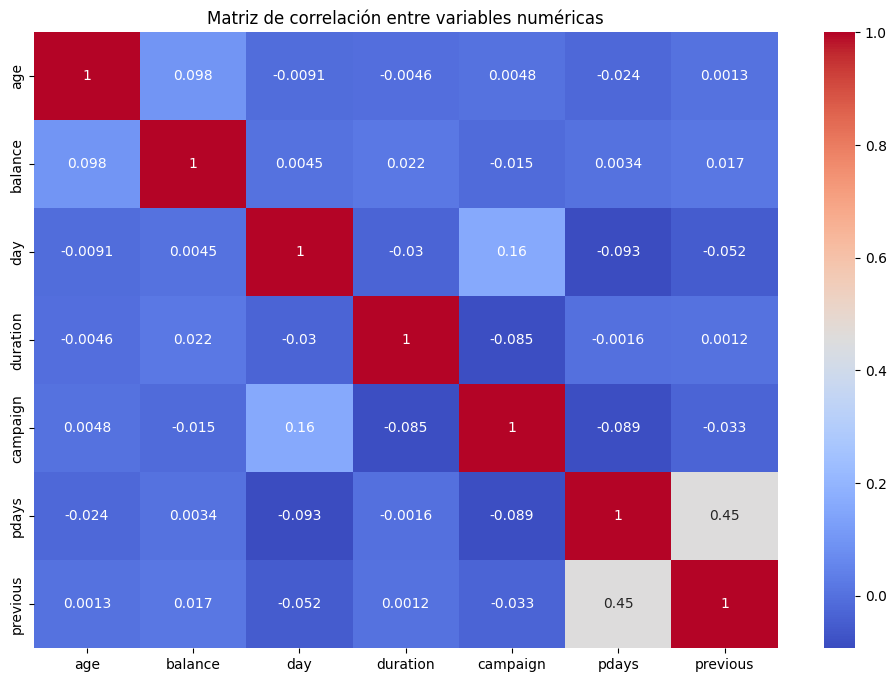

In [45]:
# Visialización general.
# Correlación numérica generadas con las columnas númericas
num_df = df.select_dtypes(include=[np.number])
correlacion_matriz = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

- La matriz de correlación muestra que no hay correlaciones lineales fuertes entre las variables numéricas (age, balance, day, duration, campaign, pdays, previous).
- Los valores de correlación son relativamente bajos, la mayoría cercanos a cero.
- La correlación más alta parece ser entre pdays y previous (0.45), lo que sugiere una relación moderada entre el número de días transcurridos desde el último contacto con el cliente y el número de contactos realizados antes de esta campaña.


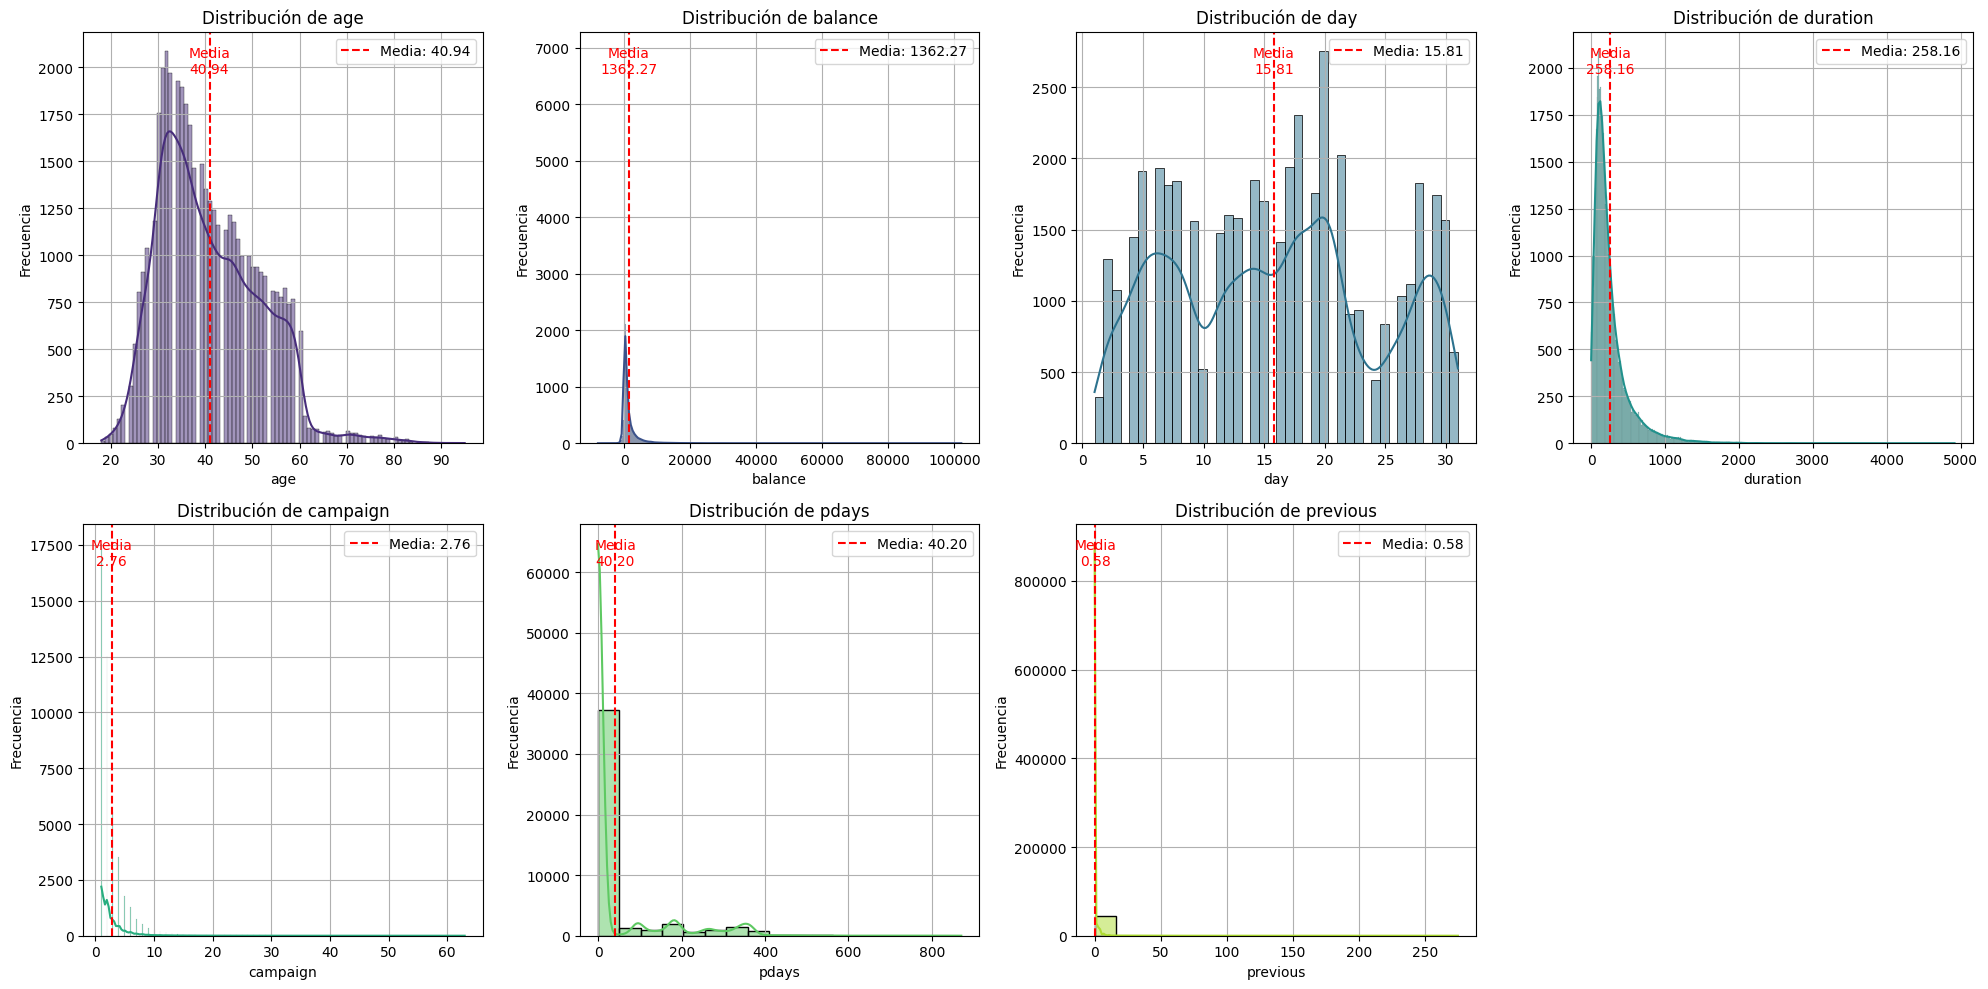

In [44]:
# Visualización 1:
# generar un color diferente para cada gráfico
colors = sns.color_palette("viridis", len(num_df.columns))

# Create a grid of subplots
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(num_df.columns) + n_cols - 1) // n_cols # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_df.columns):
    sns.histplot(num_df[col], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title("Distribución de " + col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frecuencia", fontsize=10)
    # agregar la grilla
    axes[i].grid(True, linestyle='-')
    # poner anotación de la media de cada grafico
    media = num_df[col].mean()
    axes[i].axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
    axes[i].text(media, axes[i].get_ylim()[1]*0.9, f'Media\n{media:.2f}',
             color='red', ha='center')

    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

**- age:** La distribución de la edad parece estar ligeramente sesgada a la derecha, con la mayoría de los clientes entre los 30 y 40 años. La media es de aproximadamente 40.94 años.

**- balance:** La distribución del balance está fuertemente sesgada a la derecha, con la mayoría de los clientes teniendo balances bajos. Hay algunos valores extremadamente altos que se extienden hacia la derecha. La media es de aproximadamente 1362.27.

**- day:** La distribución del día del mes parece ser relativamente uniforme a lo largo de los 31 días. La media es de aproximadamente 15.81.

**- duration:** La distribución de la duración del último contacto está fuertemente sesgada a la derecha, con la mayoría de los contactos siendo de corta duración. Hay algunos contactos de muy larga duración. La media es de aproximadamente 258.16 segundos.

**- campaign:** La distribución del número de contactos realizados durante esta campaña está sesgada a la derecha, con la mayoría de los clientes contactados solo unas pocas veces. La media es de aproximadamente 2.76 contactos.

**- pdays**: La distribución de pdays muestra un pico muy grande en -1, lo que indica que la mayoría de los clientes no fueron contactados previamente o la información no está disponible (-1 puede ser un valor centinela). La media es de aproximadamente 40.20 días.

**- previous:** La distribución del número de contactos realizados antes de esta campaña está fuertemente sesgada a la derecha, con la mayoría de los clientes teniendo cero contactos previos. La media es de aproximadamente 0.58 contactos.

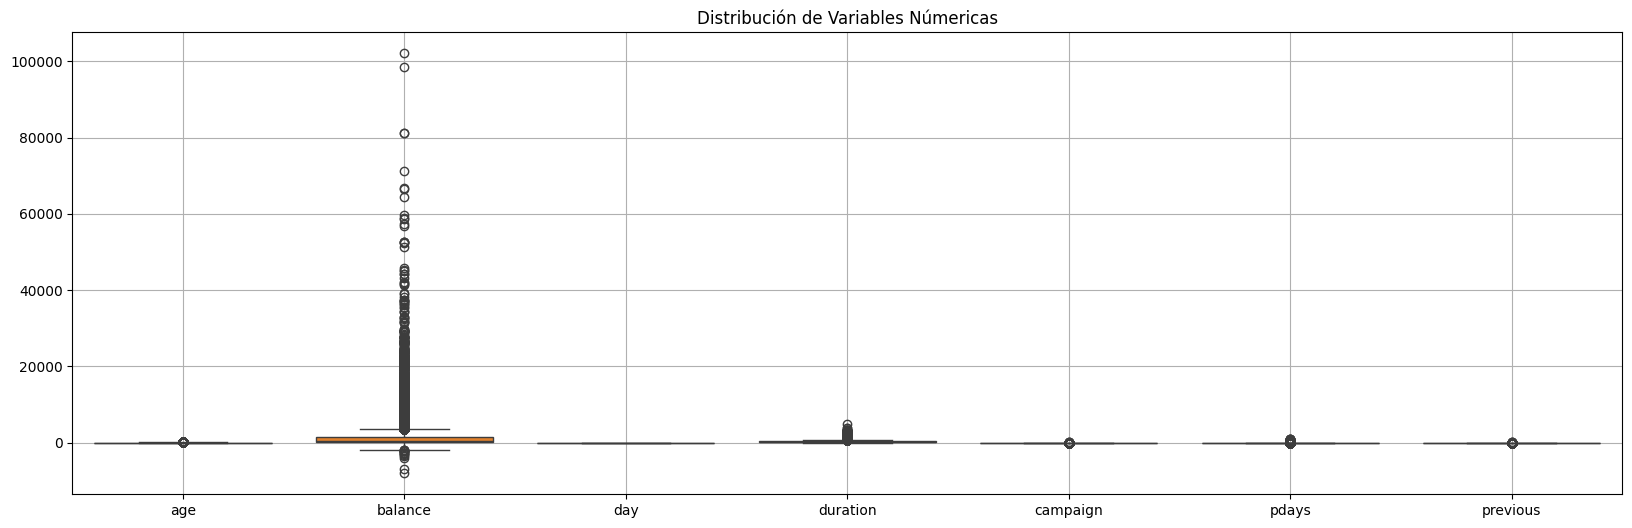

In [51]:
# Visualization 2: Boxplot para las variables numericas
#color = sns.color_palette("viridis")[1]
plt.figure(figsize=(20, 6))
sns.boxplot(data=num_df)
plt.title("Distribución de Variables Númericas")
plt.gca().grid(True, linestyle='-')
plt.show()

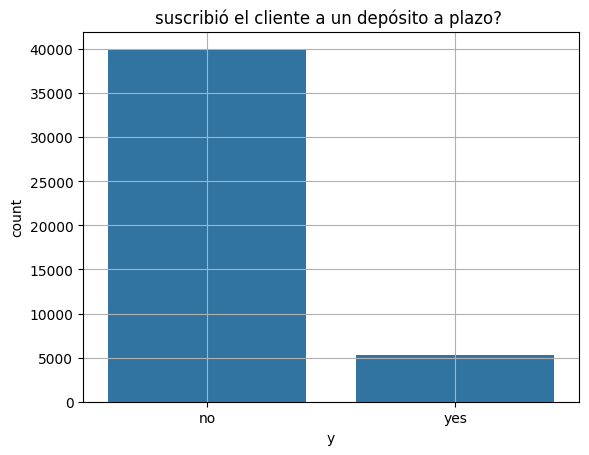

In [52]:
# Visiulización de suscripción de deposito a aplazo
sns.countplot(data=df, x='y')
plt.title("suscribió el cliente a un depósito a plazo? ")
plt.gca().grid(True, linestyle='-')
plt.show()


No se oberva una alta cantidad de clientes que hayan realizado un Deposito a Plazo

In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

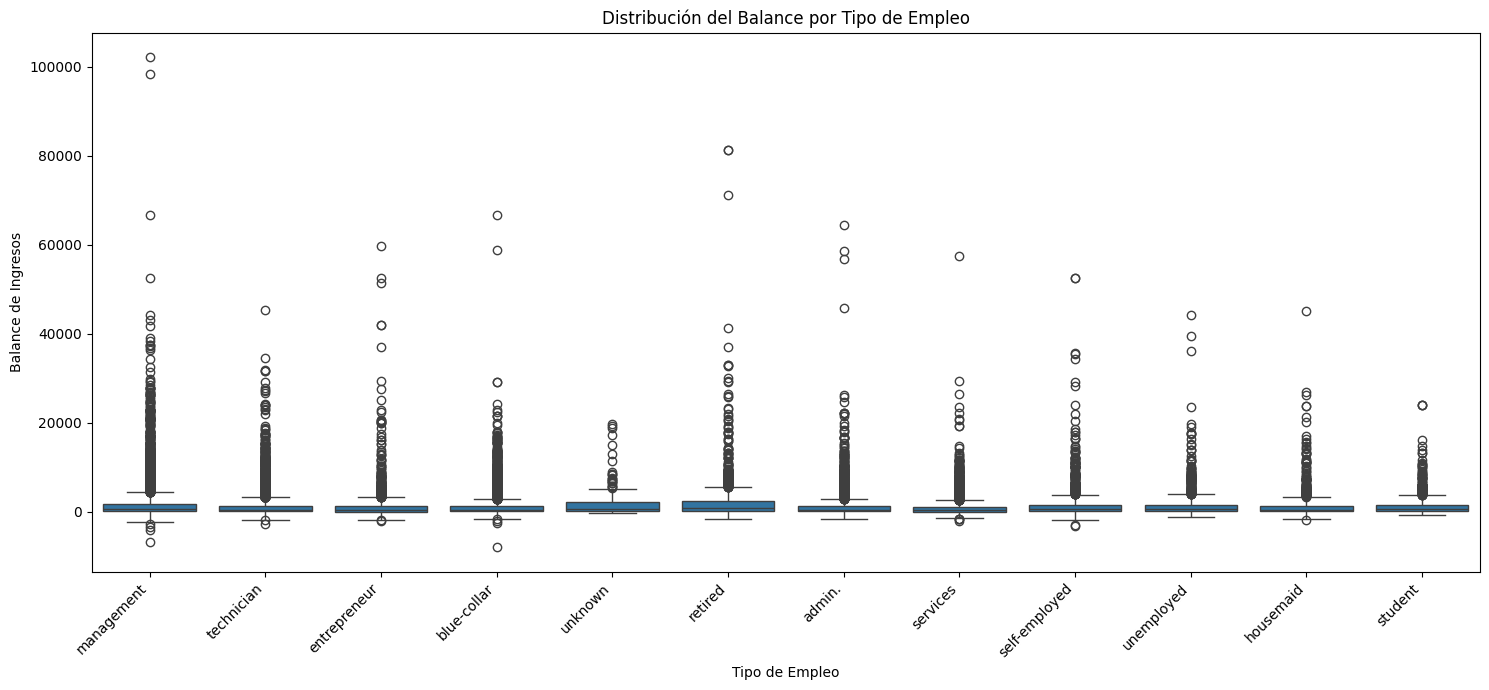

In [57]:
# Visualizacion de ingreso de los clientes por su empleo
plt.figure(figsize=(15, 7))
sns.boxplot(x='job', y='balance', data=df)
plt.title("Distribución del Balance por Tipo de Empleo")
plt.xlabel("Tipo de Empleo")
plt.ylabel("Balance de Ingresos")
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

In [59]:
# Variables categóricas y numéricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categóricas:", cat_cols)
print("\nVariables numéricas:", num_cols)


Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Variables numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [63]:
# Variables numéricas
num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Variables categóricas
cat_features =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [64]:
# Features finales
X = df[num_features + cat_features]
y = df['y']

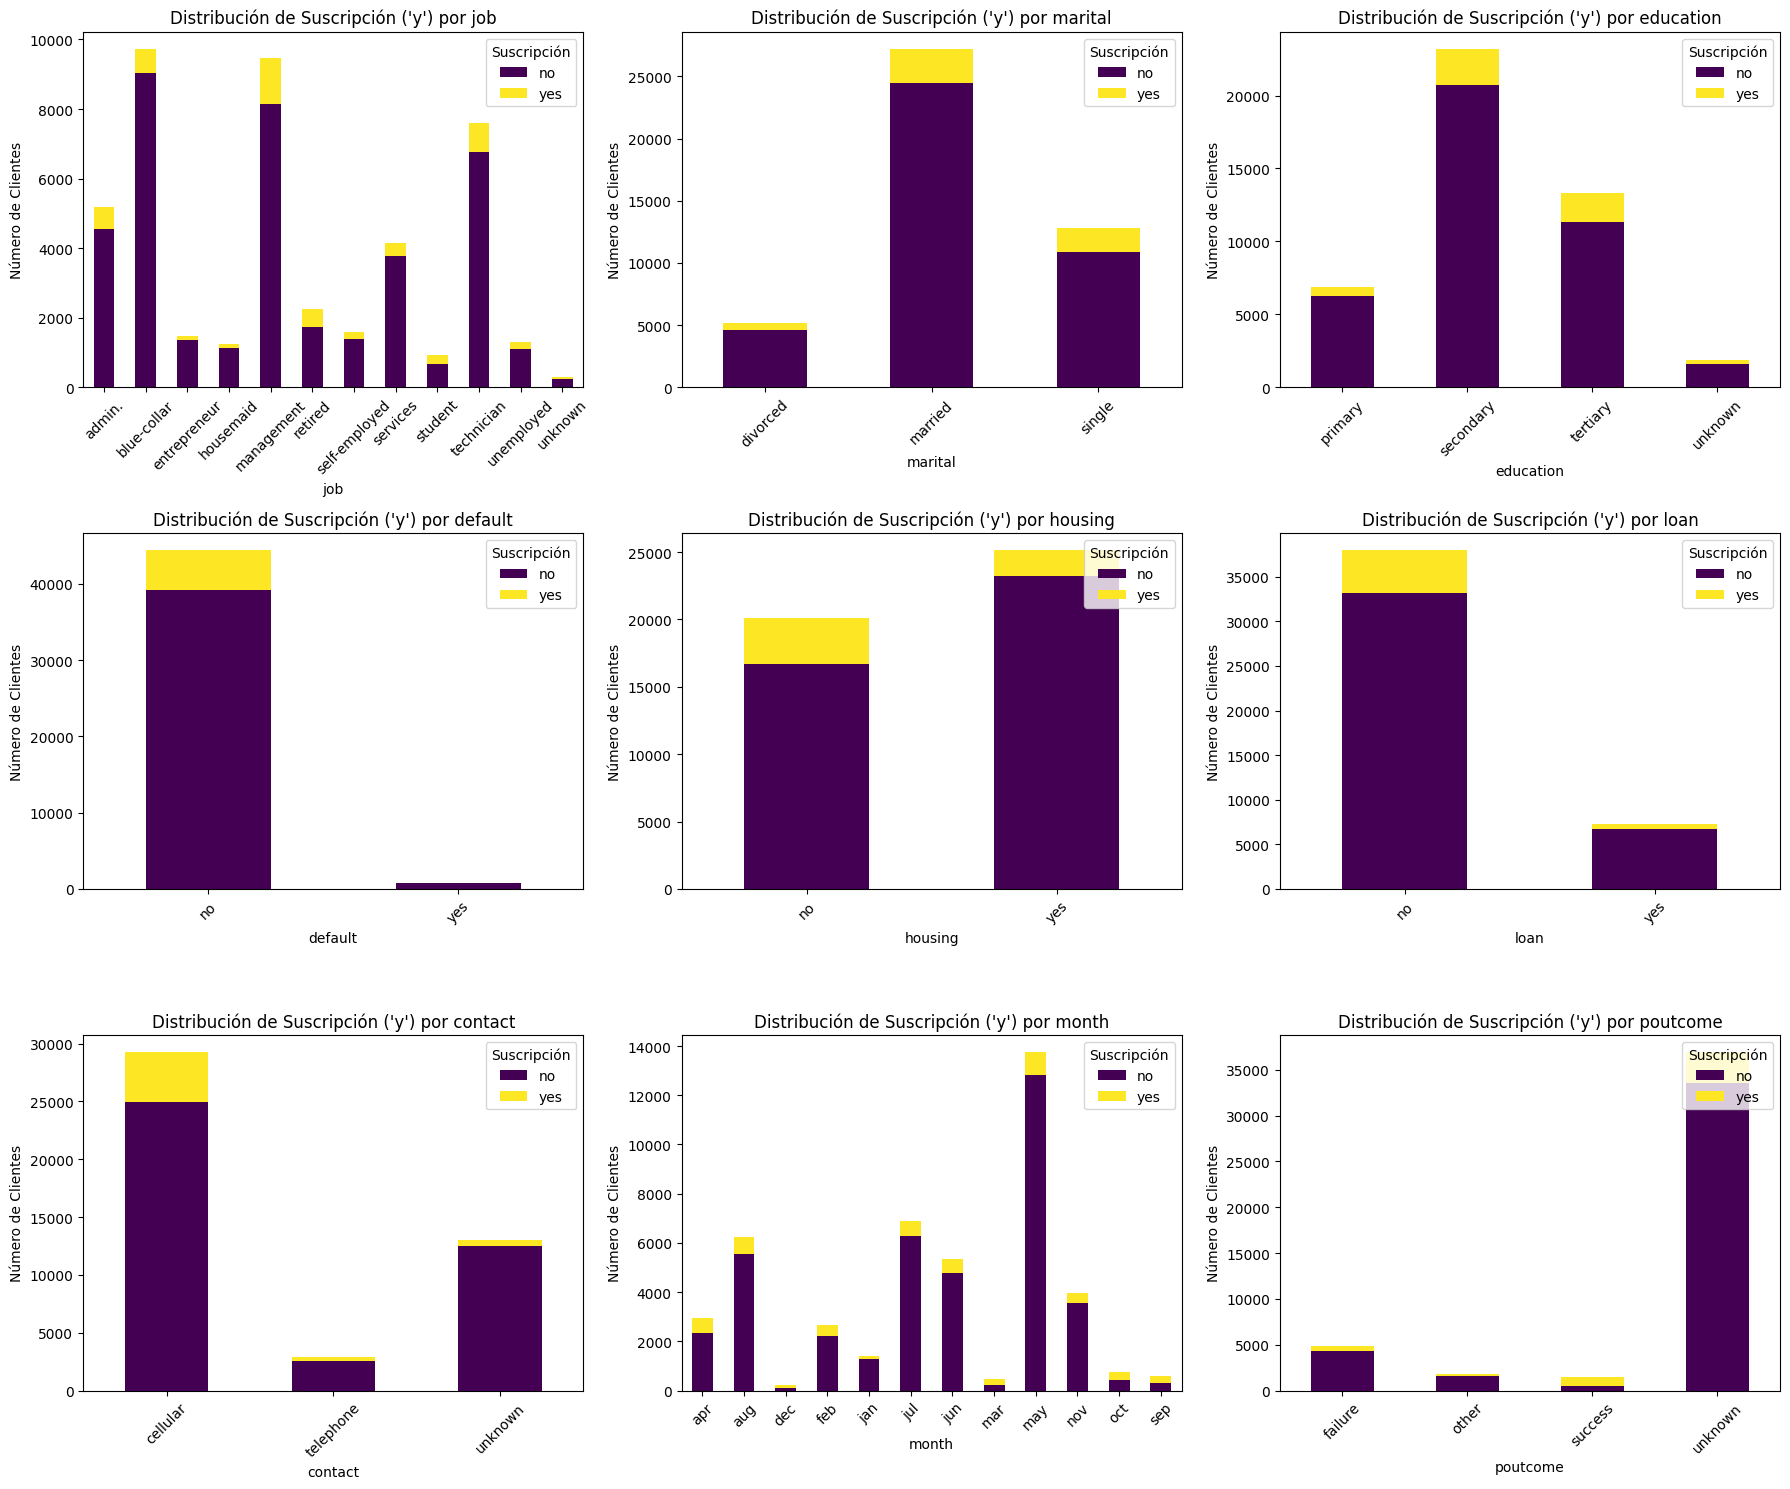

In [74]:
# Análisis de Variables Categóricas vs. Variable Objetivo 'y'
n_cols = 3
n_rows = (len(cat_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    ct = pd.crosstab(df[col], df['y'])
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_title(f"Distribución de Suscripción ('y') por {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Número de Clientes", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45) # Se eliminó ha='right'
    axes[i].legend(title='Suscripción', loc='upper right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 3. Implementación de Modelos:
**- Modelos de Clasificación:** Implementa modelos de Decision Tree y Support Vector Machine (SVM).

**- Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.

**- Comparación de Rendimiento**: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [134]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [90]:
# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough')

In [98]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Modelo 1: Regresión Logística**

In [106]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')) # Usamos class_weight='balanced' para manejar el desbalance
])

In [107]:
# Entrenar el modelo
pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42,
                                    solver='liblinear'))])

In [109]:
# Realizar predicciones en el conjunto de prueba
y_pred_lr = pipeline_lr.predict(X_test)

In [110]:
# Evaluar el rendimiento del modelo
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='yes') # Especificar la clase positiva
recall_lr = recall_score(y_test, y_pred_lr, pos_label='yes')     # Especificar la clase positiva
f1_lr = f1_score(y_test, y_pred_lr, pos_label='yes')         # Especificar la clase positiva
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels=['no', 'yes']) # Especificar el orden de las etiquetas

Precisión (Accuracy): 0.8425
Precisión (Precision) para 'yes': 0.4224
Exhaustividad (Recall) para 'yes': 0.8304
Puntuación F1 (F1-Score) para 'yes': 0.5600

Matriz de Confusión:
[[6713 1239]
 [ 185  906]]


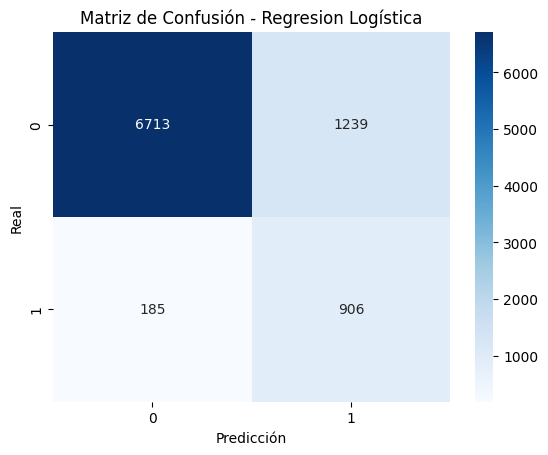


Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.97      0.84      0.90      7952
         yes       0.42      0.83      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.84      0.73      9043
weighted avg       0.91      0.84      0.86      9043



In [112]:
print(f"Precisión (Accuracy): {accuracy_lr:.4f}")
print(f"Precisión (Precision) para 'yes': {precision_lr:.4f}")
print(f"Exhaustividad (Recall) para 'yes': {recall_lr:.4f}")
print(f"Puntuación F1 (F1-Score) para 'yes': {f1_lr:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión - Regresion Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))

Evaluación Regresión Logística:

Los resultados nos muestran:

- Una precisión general **(Accuracy) del 84.25%**, que parece buena a primera vista, pero es necesario compararla con las otras métricas.
- Una precisión (Precision) para la clase 'yes' (clientes que sí suscriben) de 42.24%. Esto significa que cuando el modelo predice que un cliente suscribirá, acierta aproximadamente el 42% de las veces.
- Una exhaustividad (Recall) para la clase **'yes' de 83.04%**. Esto indica que el modelo es bastante bueno identificando la mayoría de los clientes que realmente suscriben el depósito (captura el 83% de los positivos reales).
- Una puntuación F1 (F1-Score) para la clase 'yes' de 56.00%. Esta métrica es un promedio armónico de precisión y exhaustividad, y nos da una idea general del rendimiento del modelo en la clase minoritaria.

-La matriz de confusión y el reporte de clasificación detallado reafirman estos puntos, mostrando que el modelo tiende a predecir correctamente la clase mayoritaria ('no') con alta precisión y exhaustividad, mientras que para la clase minoritaria ('yes'), prioriza la exhaustividad sobre la precisión (identifica a muchos de los "yes" reales, pero también tiene bastantes falsos positivos).
Usar class_weight='balanced' ayudó a que el modelo no ignorara por completo la clase minoritaria.

**Modelo 2 : Árbol de Desición**

In [113]:
# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [127]:
# Pipeline con DecisionTreeClassifier
# También consideraremos 'class_weight='balanced'' para manejar el desbalance de clases
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced')) # Usamos class_weight='balanced'
])

In [128]:
# Entrenar el modelo de Árbol de Decisión
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [129]:
# Predecir en test
y_pred = pipeline_dt.predict(X_test)

In [130]:
# Evaluar el rendimiento del modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label='yes') # Especificar la clase positiva
recall_dt = recall_score(y_test, y_pred_dt, pos_label='yes')     # Especificar la clase positiva
f1_dt = f1_score(y_test, y_pred_dt, pos_label='yes')         # Especificar la clase positiva
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=['no', 'yes']) # Especificar el orden de las etiquetas

Precisión (Accuracy): 0.8738
Precisión (Precision) para 'yes': 0.4740
Exhaustividad (Recall) para 'yes': 0.4170
Puntuación F1 (F1-Score) para 'yes': 0.4437

Matriz de Confusión:
[[7447  505]
 [ 636  455]]


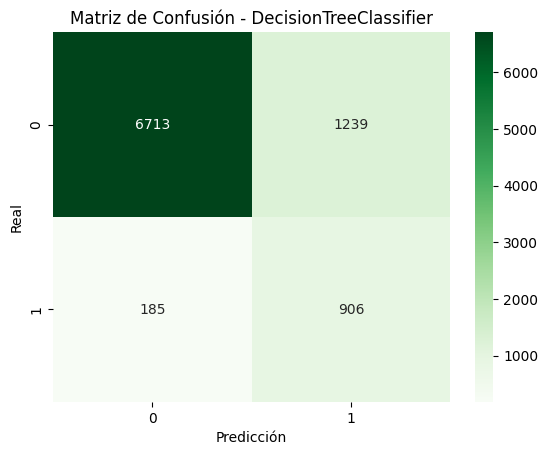


Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.92      0.94      0.93      7952
         yes       0.47      0.42      0.44      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.68      0.69      9043
weighted avg       0.87      0.87      0.87      9043



In [131]:
print(f"Precisión (Accuracy): {accuracy_dt:.4f}")
print(f"Precisión (Precision) para 'yes': {precision_dt:.4f}")
print(f"Exhaustividad (Recall) para 'yes': {recall_dt:.4f}")
print(f"Puntuación F1 (F1-Score) para 'yes': {f1_dt:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_dt)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz de Confusión - DecisionTreeClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()
# Reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))

- El Árbol de Decisión tiene una precisión general (Accuracy) de 87.38%.
- En cuanto a la clase minoritaria ('yes') alcanzó 47.4%.
- La puntuación F1 (que considera tanto precisión como exhaustividad) (44%), sugiriendo un mejor equilibrio general en la identificación de la clase minoritaria para este dataset, especialmente si minimizar los falsos negativos (no identificar a un cliente que sí suscribirá) es importante.


**Modelo 3: Random Forest**

In [135]:
# Usamos 'class_weight='balanced'' para manejar el desbalance de clases
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [137]:
# Entrenar el modelo
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [138]:
# Realizar predicciones en el conjunto de prueba
y_pred_rf = pipeline_rf.predict(X_test)

In [140]:
# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='yes') # Especificar la clase positiva
recall_rf = recall_score(y_test, y_pred_rf, pos_label='yes')     # Especificar la clase positiva
f1_rf = f1_score(y_test, y_pred_rf, pos_label='yes')         # Especificar la clase positiva
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=['no', 'yes']) # Especificar el orden de las etiquetas

Precisión (Accuracy): 0.9012
Precisión (Precision) para 'yes': 0.6875
Exhaustividad (Recall) para 'yes': 0.3327
Puntuación F1 (F1-Score) para 'yes': 0.4484

Matriz de Confusión:
[[7787  165]
 [ 728  363]]


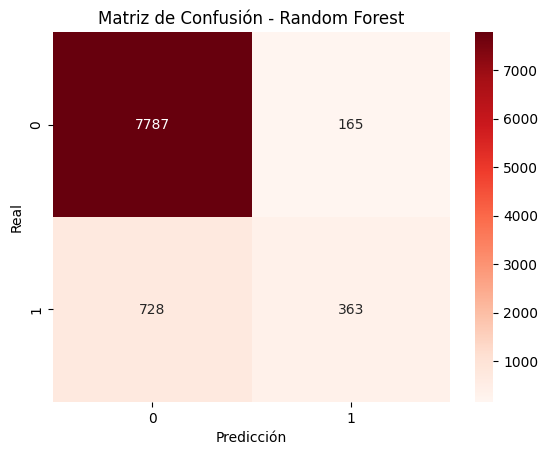


Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7952
         yes       0.69      0.33      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [150]:
print(f"Precisión (Accuracy): {accuracy_rf:.4f}")
print(f"Precisión (Precision) para 'yes': {precision_rf:.4f}")
print(f"Exhaustividad (Recall) para 'yes': {recall_rf:.4f}")
print(f"Puntuación F1 (F1-Score) para 'yes': {f1_rf:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds')
plt.title(f'Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

- Accuracy: Random Forest tiene la mayor precisión general (90.12%)
- Precision ('yes'): Random Forest también tiene la mayor precisión para la clase 'yes' (68.75%), lo que significa que cuando predice que un cliente suscribirá, es mucho más probable que sea correcto que los otros dos modelos.
- Recall ('yes'): Sin embargo, Random Forest tiene la menor exhaustividad para la clase 'yes' (33.27%). Esto significa que identifica a menos de la mitad de los clientes que realmente suscribieron el depósito a plazo.
- F1-Score ('yes'): La puntuación F1 del Random Forest (44.84%)

El modelo de Random Forest, en su configuración actual con class_weight='balanced', parece ser muy bueno prediciendo la clase mayoritaria ('no') y cuando predice la clase minoritaria ('yes'), es bastante preciso. Sin embargo, pierde una gran cantidad de los verdaderos casos positivos ('yes'). Esto podría deberse a que, a pesar de class_weight, el modelo todavía está influenciado por el gran número de ejemplos de la clase 'no'.

**Modelo 4: Suport Vector Machine (SVM)**

In [144]:
from sklearn.svm import SVC

In [145]:
# Usamos 'class_weight='balanced'' para manejar el desbalance de clases
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, class_weight='balanced'))
])

In [146]:
# Entrenar el modelo
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier', SVC(class_weight='balanced', random_state=42))])

In [147]:
# Realizar predicciones en el conjunto de prueba
y_pred_svm = pipeline_svm.predict(X_test)

In [148]:
# Evaluar el rendimiento del modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='yes') # Especificar la clase positiva
recall_svm = recall_score(y_test, y_pred_svm, pos_label='yes')     # Especificar la clase positiva
f1_svm = f1_score(y_test, y_pred_svm, pos_label='yes')         # Especificar la clase positiva
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm, labels=['no', 'yes']) # Especificar el orden de las etiquetas

Precisión (Accuracy): 0.8439
Precisión (Precision) para 'yes': 0.4291
Exhaustividad (Recall) para 'yes': 0.8900
Puntuación F1 (F1-Score) para 'yes': 0.5790

Matriz de Confusión:
[[6660 1292]
 [ 120  971]]


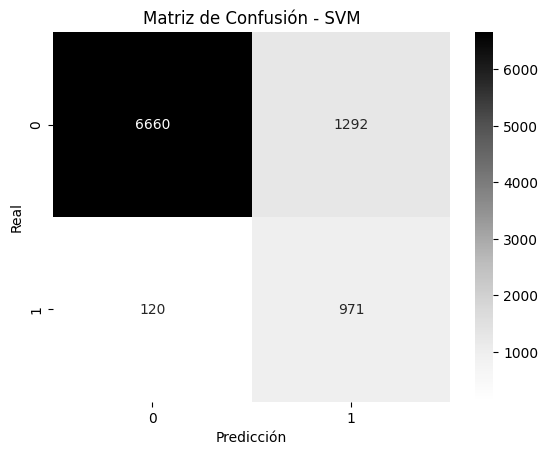


Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.98      0.84      0.90      7952
         yes       0.43      0.89      0.58      1091

    accuracy                           0.84      9043
   macro avg       0.71      0.86      0.74      9043
weighted avg       0.92      0.84      0.86      9043



In [151]:
print(f"Precisión (Accuracy): {accuracy_svm:.4f}")
print(f"Precisión (Precision) para 'yes': {precision_svm:.4f}")
print(f"Exhaustividad (Recall) para 'yes': {recall_svm:.4f}")
print(f"Puntuación F1 (F1-Score) para 'yes': {f1_svm:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greys')
plt.title(f'Matriz de Confusión - SVM')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))

- Accuracy: La precisión general del SVM (84.39%) es muy similar a la de la Regresión Logística (84.25%) y ligeramente inferior a la del Árbol de Decisión (87.38%) y Random Forest (90.12%).
- Precision ('yes'): La precisión para la clase 'yes' (42.91%) es similar a la de la Regresión Logística (42.24%) pero significativamente menor que la de Random Forest (68.75%).
- Recall ('yes'): El SVM tiene la mayor exhaustividad (Recall) para la clase 'yes' (89.00%) entre todos los modelos probados hasta ahora. Esto significa que el SVM fue el mejor en identificar correctamente a la mayoría de los clientes que realmente suscribieron el depósito a plazo.
- F1-Score ('yes'): La puntuación F1 del SVM (57.90%) es la más alta entre todos los modelos probados, indicando el mejor equilibrio general entre precisión y exhaustividad para la clase minoritaria en este conjunto de pruebas.

Considerando las métricas para la clase minoritaria ('yes'), el modelo SVM con class_weight='balanced' parece ser el más prometedor hasta ahora, especialmente si tu objetivo principal es identificar a la mayor cantidad posible de clientes que probablemente suscribirán el depósito (alta exhaustividad) sin sacrificar demasiado la precisión. Su F1-Score más alto respalda esto.

**Comparación de los Modelos:**
Considerando el desbalance del dataset (muchos más clientes no suscriben que los que sí lo hacen), las métricas para la clase minoritaria ('yes') son cruciales para entender qué tan bien el modelo identifica a los clientes interesados en el depósito a plazo.

Aquí hay una tabla comparativa de las métricas clave para la clase 'yes' y la precisión general:

Modelo	      (yes)Precision -	Recall -	F1-Score -	Accuracy

Reg. Logística:   	0.4224 --    	0.8304	 --       0.5600	  --  0.8425

Árbol Decisión:  	  0.4740 --    	0.4170	 --       0.4437	  --  0.8738

Random Forest:     	0.6875  --    0.3327	--   0.4484	 --     0.9012

Sup. Vec. Machine:	              0.4291	--     0.8900	--   0.5790	 --     0.8439



**Análisis de los Resultados:**

- Accuracy General: Random Forest tiene la mayor precisión general (90.12%), lo cual es esperado para este tipo de modelo, pero esta métrica puede ser engañosa en datasets desbalanceados, ya que un modelo podría simplemente predecir la clase mayoritaria la mayoría de las veces y aun así tener una alta precisión.
- Precision ('yes'): Random Forest es el modelo con la mayor precisión para predecir la clase 'yes' (68.75%). Esto significa que cuando Random Forest dice que un cliente suscribirá, es el más confiable.
- Recall ('yes'): SVM tiene la mayor exhaustividad (Recall) para la clase 'yes' (89.00%), seguido de cerca por la Regresión Logística (83.04%). Estos modelos son los mejores identificando a la mayoría de los clientes que realmente suscriben el depósito.
- F1-Score ('yes'): SVM tiene la puntuación F1 más alta para la clase 'yes' (0.5790), lo que indica el mejor equilibrio entre precisión y exhaustividad para la clase minoritaria en este conjunto de pruebas.

### Optimización de Hiperparámetros con GridSearchCV (SVM)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # Importamos RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

In [ ]:
# Crear un scorer personalizado para F1-score de la clase positiva ('yes')
f1_scorer = make_scorer(f1_score, pos_label='yes')

# Definir el pipeline con el preprocesador y el clasificador Random Forest
pipeline_rf_gs = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [ ]:
# Definir la cuadrícula de parámetros para GridSearchCV para Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100], # Número de árboles en el bosque (reducido)
    'classifier__max_depth': [10, 20], # Profundidad máxima del árbol (reducido)
    'classifier__min_samples_split': [2], # Número mínimo de muestras requeridas para dividir un nodo interno (reducido)
    'classifier__min_samples_leaf': [1] # Número mínimo de muestras requeridas en un nodo hoja (reducido)
}

In [154]:
# Configurar GridSearchCV
# Usaremos cv=3 para validación cruzada
# scoring='f1_scorer' para optimizar el F1-score de la clase positiva
grid_search_rf = GridSearchCV(
    pipeline_rf_gs,
    param_grid_rf,
    cv=3, # Número de folds para validación cruzada
    scoring=f1_scorer, # Métrica a optimizar
    n_jobs=-1, # Usar todos los cores disponibles
    verbose=2 # Mostrar progreso
)

# Ejecutar la búsqueda en cuadrícula en los datos de entrenamiento
print("Ejecutando GridSearchCV para Random Forest con parámetros reducidos...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV completado.")

Ejecutando GridSearchCV para Random Forest con parámetros reducidos...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
GridSearchCV completado.


Ejecutando GridSearchCV para Random Forest con parámetros reducidos...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
GridSearchCV completado.

Hemos configurado y ejecutado `GridSearchCV` para encontrar los mejores hiperparámetros para el modelo SVM, optimizando el F1-score para la clase 'yes'.

El siguiente paso será obtener los mejores parámetros y evaluar el mejor modelo encontrado por `GridSearchCV` en el conjunto de prueba para ver su rendimiento final.

Evaluar el Mejor Modelo de Random Forest encontrado por GridSearchCV

In [156]:
# Obtener los mejores parámetros y el mejor score de la búsqueda
print("Mejores parámetros encontrados por GridSearchCV:")
print(grid_search_rf.best_params_)

print("\nMejor F1-Score (clase 'yes') en validación cruzada:")
print(grid_search_rf.best_score_)

Mejores parámetros encontrados por GridSearchCV:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Mejor F1-Score (clase 'yes') en validación cruzada:
0.5598507690941927


In [157]:
# Obtener el mejor modelo (pipeline) encontrado por GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
print("\nEvaluando el mejor modelo de Random Forest en el conjunto de prueba...")
y_pred_best_rf = best_rf_model.predict(X_test)


Evaluando el mejor modelo de Random Forest en el conjunto de prueba...


In [158]:
# Evaluar el rendimiento del mejor modelo en el conjunto de prueba
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, pos_label='yes')
recall_best_rf = recall_score(y_test, y_pred_best_rf, pos_label='yes')
f1_best_rf = f1_score(y_test, y_pred_best_rf, pos_label='yes')
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf, labels=['no', 'yes'])


Precisión (Accuracy) del mejor modelo: 0.8395
Precisión (Precision) para 'yes' del mejor modelo: 0.4193
Exhaustividad (Recall) para 'yes' del mejor modelo: 0.8570
Puntuación F1 (F1-Score) para 'yes' del mejor modelo: 0.5631

Matriz de Confusión del mejor modelo:
[[6657 1295]
 [ 156  935]]


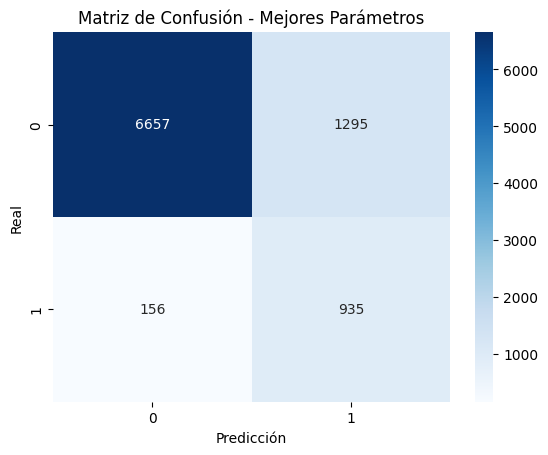


Reporte de Clasificación del mejor modelo:
              precision    recall  f1-score   support

          no       0.98      0.84      0.90      7952
         yes       0.42      0.86      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.85      0.73      9043
weighted avg       0.91      0.84      0.86      9043



In [161]:
print(f"\nPrecisión (Accuracy) del mejor modelo: {accuracy_best_rf:.4f}")
print(f"Precisión (Precision) para 'yes' del mejor modelo: {precision_best_rf:.4f}")
print(f"Exhaustividad (Recall) para 'yes' del mejor modelo: {recall_best_rf:.4f}")
print(f"Puntuación F1 (F1-Score) para 'yes' del mejor modelo: {f1_best_rf:.4f}")
print("\nMatriz de Confusión del mejor modelo:")
print(conf_matrix_best_rf)
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión - Mejores Parámetros')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()
# Reporte de clasificación completo del mejor modelo
print("\nReporte de Clasificación del mejor modelo:")
print(classification_report(y_test, y_pred_best_rf))

Hemos evaluado el modelo de Random Forest con los mejores hiperparámetros encontrados por `GridSearchCV`.

## Resumen y Conclusiones del Análisis de Marketing Bancario

Este proyecto tuvo como objetivo predecir si un cliente de un banco suscribiría un depósito a plazo (`y`) basándose en datos de campañas de marketing. Se siguieron los siguientes pasos:

### 1. Limpieza y Exploración de Datos
### 2. Implementación y Evaluación de Modelos de Clasificación
Los modelos evaluados fueron:
- Regresión Logística
- Árbol de Decisión
- Random Forest
- Support Vector Machine (SVM)

Las métricas clave para la evaluación, especialmente importantes debido al desbalance, fueron la Precisión, Exhaustividad (Recall) y F1-Score para la clase positiva ('yes'), además de la Precisión general (Accuracy).

### 3. Comparación de Rendimiento

| Modelo                | Precision ('yes') | Recall ('yes') | F1-Score ('yes') | Accuracy |
| :-------------------- | :---------------- | :------------- | :--------------- | :------- |
| Regresión Logística   | 0.4224            | **0.8304**     | 0.5600           | 0.8425   |
| Árbol de Decisión     | 0.4740            | 0.4170         | 0.4437           | 0.8738   |
| Random Forest         | **0.6875**        | 0.3327         | 0.4484           | **0.9012**|
| SVM                   | 0.4291            | **0.8900**     | **0.5790**       | 0.8439   |
| Random Forest (Optimizado con GridSearchCV) | 0.4193 | 0.8570 | 0.5631 | 0.8395 |


### 4. Optimización de Hiperparámetros (Random Forest)

Se realizó una optimización de hiperparámetros para el modelo Random Forest utilizando `GridSearchCV`, buscando maximizar el F1-Score para la clase 'yes'. Los mejores parámetros encontrados fueron: `{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}`.

La evaluación del modelo Random Forest con estos parámetros optimizados en el conjunto de prueba mostró:
- Precisión (Accuracy): 0.8395
- Precisión (Precision) para 'yes': 0.4193
- Exhaustividad (Recall) para 'yes': 0.8570
- Puntuación F1 (F1-Score) para 'yes': 0.5631

### Conclusiones Finales

- El **desbalance de clases** es un factor crítico en este dataset y afecta significativamente el rendimiento de los modelos, especialmente en la identificación de la clase minoritaria ('yes').
- El modelo **SVM** y la **Regresión Logística** destacaron por su **alta exhaustividad (Recall)** en la clase 'yes', siendo los mejores en identificar a la mayoría de los clientes que realmente suscribieron el depósito.
- El modelo **Random Forest** (sin optimizar) tuvo la **mayor precisión (Precision)** en la clase 'yes', siendo el más confiable cuando predice una suscripción, aunque a costa de una baja exhaustividad.
- El **SVM** obtuvo el **mejor F1-Score** para la clase 'yes', sugiriendo el mejor equilibrio general entre precisión y exhaustividad en este conjunto de pruebas.
- La optimización de hiperparámetros con GridSearchCV en el Random Forest con la cuadrícula reducida no superó significativamente el rendimiento de los otros modelos en las métricas de la clase minoritaria. Una búsqueda de parámetros más exhaustiva o el uso de RandomizedSearchCV podrían explorarse si el tiempo lo permite.
